http://cs229.stanford.edu/ps/ps2/ps2.pdf

### Logistic Loss and its Gradient

This section continues the subject matter from loss-functions.pdf. 

Define $g$ to be the sigmoid function:

$$
g(z)\equiv\frac{1}{1+e^{-z}}
$$

In the notebook Binary-Logistic-Regression, we showed that the sigmoid is a cumulative distribution function and its density is symmetric about zero. This makes the sigmoid a good candidate to define a probability model for binary classification.

Let $\mathscr{Y}$ be a discrete random variable with values in $\{-1,1\}$. And let $\mathscr{X}=[\mathscr{X}_1,...,\mathscr{X}_n]^{T}$ be a continuous random vector.

Define the __logistic model__ for classification as

$$
P(\mathscr{Y}=y^{(i)}\mid\mathscr{X}=x^{(i)};\theta)=g(y^{(i)}\theta^Tx^{(i)})=\frac{1}{1+e^{-y^{(i)}\theta^Tx^{(i)}}}
$$

For intepretation, we see that if the margin $y^{(i)}\theta^Tx^{(i)}$ is large — bigger than, say, 5 or so — then $P(\mathscr{Y} = y^{(i)}\lvert\mathscr{X}=x^{(i)};\theta) = g(y^{(i)}\theta^Tx^{(i)})\approx1$. That is, we assign nearly probability 1 to the event that the label is $y^{(i)}$. Conversely, if $y^{(i)}\theta^Tx^{(i)}$ is quite negative, then $P(\mathscr{Y} = y^{(i)}\mid\mathscr{X}=x^{(i)};\theta)\approx0$.

Define the hypothesis function $h_\theta$ as

$$
h_\theta(x)\equiv g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}
$$

Given a training set $\{X,y\}=\{x^{(i)},y^{(i)}\}_{i=1}^{m}$ of independent observations from $\mathscr{X},\mathscr{Y}$, then we define our likelihood as

$$\begin{align*}
\mathscr{L}(\theta) &= p(y\mid X;\theta) \\
    &= P(\mathscr{Y}=y^{(1)}\mid\mathscr{X}=x^{(1)},...,\mathscr{Y}=y^{(m)}\mid\mathscr{X}=x^{(m)};\theta) \\
    &= \prod_{i=1}^{m}P(\mathscr{Y}=y^{(i)}\lvert\mathscr{X}=x^{(i)};\theta)\tag{Independent observations} \\
    &= \prod_{i=1}^{m}g(y^{(i)}\theta^Tx^{(i)})\tag{LLG.0}
\end{align*}$$

Then our log-likelihood is

$$
\mathscr{l}(\theta)=\sum_{i=1}^{m}\log\big(g(y^{(i)}\theta^Tx^{(i)})\big)
$$

Let $\phi$ be the __logistic loss__ defined as

$$
\phi(z)\equiv\log(1+e^{-z})=\log\Big(\Big[\frac{1}{1+e^{-z}}\Big]^{-1}\Big)=\log\big(g(z)^{-1}\big)=-\log\big(g(z)\big)
$$

The __logistic objective__ function (aka __logistic risk__) is

$$
J(\theta)\equiv\frac{1}{m}\sum_{i=1}^{m}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)=-\frac{1}{m}\sum_{i=1}^{m}\log\big(g(y^{(i)}\theta^Tx^{(i)})\big)=-\frac{1}{m}\mathscr{l}(\theta)
$$

From p.6 of loss-functions.pdf, we have

$$
\frac{\partial}{\partial \theta_k}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)=-g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}_k
$$

Hence

$$\begin{align*}
\nabla J(\theta) &= \frac{1}{m}\sum_{i=1}^{m}\nabla\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\\\\
    &=\frac{1}{m}\sum_{i=1}^{m}\begin{bmatrix}\frac{\partial}{\partial \theta_1}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\\\vdots\\\frac{\partial}{\partial \theta_n}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\end{bmatrix} \\\\
    &=\frac{1}{m}\sum_{i=1}^{m}\begin{bmatrix}-g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}_1\\\vdots\\-g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}_n\end{bmatrix} \\\\
    &= -\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}\begin{bmatrix}x^{(i)}_1\\\vdots\\x^{(i)}_n\end{bmatrix}\\\\
    &=-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}\tag{LLG.1}\\\\
\end{align*}$$

Alternatively, we can vectorize this
    
$$\begin{align*}
\nabla J(\theta) &= \frac{1}{m}\sum_{i=1}^{m}\nabla\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\\\\
    &=\frac{1}{m}\sum_{i=1}^{m}\begin{bmatrix}\frac{\partial}{\partial \theta_1}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\\\vdots\\\frac{\partial}{\partial \theta_n}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\end{bmatrix} \\\\
    &= \frac{1}{m}\sum_{i=1}^{m}\begin{bmatrix}-g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}_1\\\vdots\\-g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}_n\end{bmatrix} \\\\
    &=-\frac{1}{m}\begin{bmatrix}\sum_{i=1}^{m}x_1^{(i)}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}\\\vdots\\\sum_{i=1}^{m}x_n^{(i)}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}\end{bmatrix}\\\\
    &=-\frac{1}{m}\begin{bmatrix}x_1^{(1)}&\dots&x_1^{(m)}\\\vdots&\ddots&\vdots\\x_n^{(1)}&\dots&x_n^{(m)}\end{bmatrix}\begin{bmatrix}g\big(-y^{(1)}\theta^Tx^{(1)}\big)y^{(1)}\\\vdots\\g\big(-y^{(m)}\theta^Tx^{(m)}\big)y^{(m)}\end{bmatrix}\\\\
    &=-\frac{1}{m}\begin{bmatrix}x^{(1)}&\dots&x^{(m)}\end{bmatrix}\begin{bmatrix}g\big(-y^{(1)}\theta^Tx^{(1)}\big)y^{(1)}\\\vdots\\g\big(-y^{(m)}\theta^Tx^{(m)}\big)y^{(m)}\end{bmatrix}\\\\
    &=-\frac{1}{m}\begin{bmatrix}(x^{(1)})^T\\\vdots\\(x^{(m)})^T\end{bmatrix}\begin{bmatrix}g\big(-y^{(1)}\theta^Tx^{(1)}\big)y^{(1)}\\\vdots\\g\big(-y^{(m)}\theta^Tx^{(m)}\big)y^{(m)}\end{bmatrix}\\\\
    &=-\frac{1}{m}X^T\begin{bmatrix}g\big(-y^{(1)}\theta^Tx^{(1)}\big)y^{(1)}\\\vdots\\g\big(-y^{(m)}\theta^Tx^{(m)}\big)y^{(m)}\end{bmatrix}\\\\
    &=-\frac{1}{m}X^T(p * y)\tag{LLG.2}\\\\
\end{align*}$$

where '$*$' denotes elementwise multiplication and

$$
p\equiv\begin{bmatrix}g\big(-y^{(1)}\theta^Tx^{(1)}\big)\\\vdots\\g\big(-y^{(m)}\theta^Tx^{(m)}\big)\end{bmatrix}\quad\text{and}\quad y\equiv\begin{bmatrix}y^{(1)}\\\vdots\\y^{(m)}\end{bmatrix}
$$

# (a)

The most notable difference is that training of data_b doesn't seem to converge whereas that of data_a converges quickly.

# (b)

In [1]:
def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def sigmoid(z):
    # we want to prevent overflow in np.exp(), so we first clip z
    signal = np.clip(z, -700, 700)
    return 1. / (1 + np.exp(-z))

def logistic_cost(probs, regularization=0, theta=0):
    return -np.mean(np.log(probs)) + (regularization * (np.linalg.norm(theta)**2))

def logistic_grad(X, Y, probs, regularization=0, theta=0):
    # the grad is an implementation of LLG.2 from the top of the page
    # regularization for grad follows from PS-0, Question 1a
    return -(1./X.shape[0]) * (X.T.dot(probs * Y)) + (regularization * 2 * theta)

def logistic_cost_and_grad(X, Y, theta, regularization=0, cog='both'):
    margins = Y * X.dot(theta)
    th = theta if regularization else 0
    if cog == 'grad':
        probs = sigmoid(-margins)
        return logistic_grad(X, Y, probs, regularization=regularization, theta=th)
    if cog == 'cost':
        probs = sigmoid(margins)
        return logistic_cost(probs, regularization=regularization, theta=th)
    if cog == 'both':
        pc = sigmoid(margins)
        pg = 1 - pc
        cost = logistic_cost(pc, regularization=regularization, theta=th)
        grad = logistic_grad(X, Y, pg, regularization=regularization, theta=th)
        return cost, grad

def logistic_regression(X, Y, scale_lr_geom=False, scale_lr_prop=0, regularization=0):
    theta = np.zeros(X.shape[1])
    learning_rate = 10
    thetas, thetas_sample, errors, losses = [], [], [], []
    i = 0
    while True:
        i += 1
        prev_theta = theta
        cost, grad = logistic_cost_and_grad(X, Y, theta, regularization=regularization, cog='both')
        theta = theta - learning_rate * grad
        thetas.append(theta)
        errors.append(np.linalg.norm(prev_theta - theta))
        losses.append(cost)
        if scale_lr_geom: learning_rate /= (i**2)
        if scale_lr_prop: learning_rate *= scale_lr_prop
        if i % 10000 == 0:
            print('iters={} theta={} error={} loss={}'.format(i, theta, errors[-1], losses[-1]))
            thetas_sample.append(theta)
        if errors[-1] < 1e-15:
            print('Converged in %d iterations' % i)
            break
        if i == 200 * 1000:
            break
    return np.array(thetas), thetas_sample, errors, losses

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dfa = pd.read_csv('http://cs229.stanford.edu/ps/ps2/data_a.txt', header=None, sep=' ', names=['label', 'x1', 'x2'])

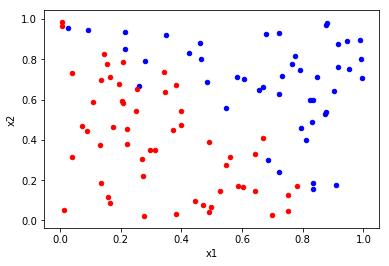

In [4]:
ax = plt.axes()

dfa.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
dfa.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

In [5]:
dfb = pd.read_csv('http://cs229.stanford.edu/ps/ps2/data_b.txt', header=None, sep=' ', names=['label', 'x1', 'x2'])

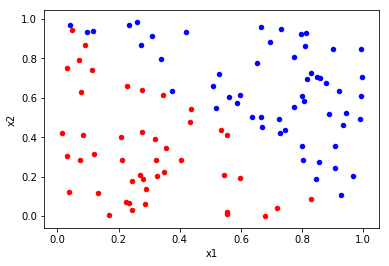

In [6]:
ax = plt.axes()

dfb.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
dfb.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

In [7]:
Xa, Ya = load_data('data_a.txt')
thetas_a, thetas_sample_a, errors_a, losses_a = logistic_regression(Xa, Ya)
print("theta for dataset a={}".format(thetas_a[-1]))

iters=10000 theta=[-20.81394174  21.45250215  19.85155266] error=7.226491864936692e-07 loss=0.15988748221132873
iters=20000 theta=[-20.81437785  21.45295156  19.85198173] error=5.3329818166826493e-11 loss=0.15988748218387225
iters=30000 theta=[-20.81437788  21.45295159  19.85198176] error=6.153480596427404e-15 loss=0.1598874821838722
Converged in 30392 iterations
theta for dataset a=[-20.81437788  21.45295159  19.85198176]


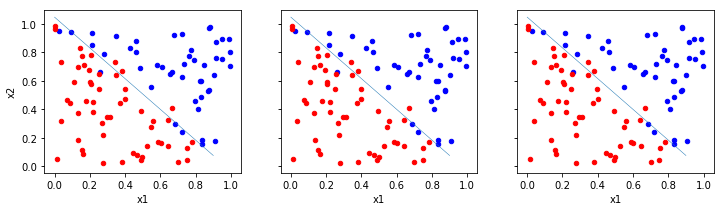

In [8]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 3))
axes = axes.ravel()

for k, theta in enumerate(thetas_sample_a[:3]):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    dfa.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
    dfa.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

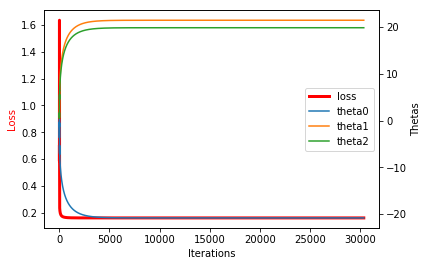

In [9]:
iz = np.arange(1,len(losses_a)+1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lss, = ax1.plot(iz, losses_a, 'r-', label = 'loss', linewidth=3)
th0, = ax2.plot(iz, thetas_a[:,0], label='theta0')
th1, = ax2.plot(iz, thetas_a[:,1], label='theta1')
th2, = ax2.plot(iz, thetas_a[:,2], label='theta2')
plt.legend(handles=[lss, th0, th1, th2])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Thetas')
ax2
plt.show()

In [10]:
Xb, Yb = load_data('data_b.txt')
thetas_b, thetas_sample_b, errors_b, losses_b = logistic_regression(Xb, Yb)
print("theta for dataset b={}".format(thetas_b[-1]))

iters=10000 theta=[-52.74109217  52.92982273  52.69691453] error=0.003361039469518825 loss=0.030452051871472686
iters=20000 theta=[-68.10040977  68.26496086  68.09888223] error=0.002173205351041188 loss=0.023256142901786184
iters=30000 theta=[-79.01759142  79.17745526  79.03755803] error=0.0016644896054955345 loss=0.01965553148240559
iters=40000 theta=[-87.70771189  87.87276307  87.73897393] error=0.00137040952812708 loss=0.017379900838977568
iters=50000 theta=[-95.01838735  95.1948202   95.0551918 ] error=0.0011758957242939641 loss=0.015770870290852234
iters=60000 theta=[-101.37921493  101.57119731  101.41805781] error=0.0010366393703263115 loss=0.014553192642742461
iters=70000 theta=[-107.04156569  107.25200975  107.08020705] error=0.0009315199306059815 loss=0.013588320669379629
iters=80000 theta=[-112.16638881  112.39737225  112.20335022] error=0.0008490730225995943 loss=0.012797892595060763
iters=90000 theta=[-116.86340448  117.11642203  116.89769046] error=0.0007824983080599451 lo

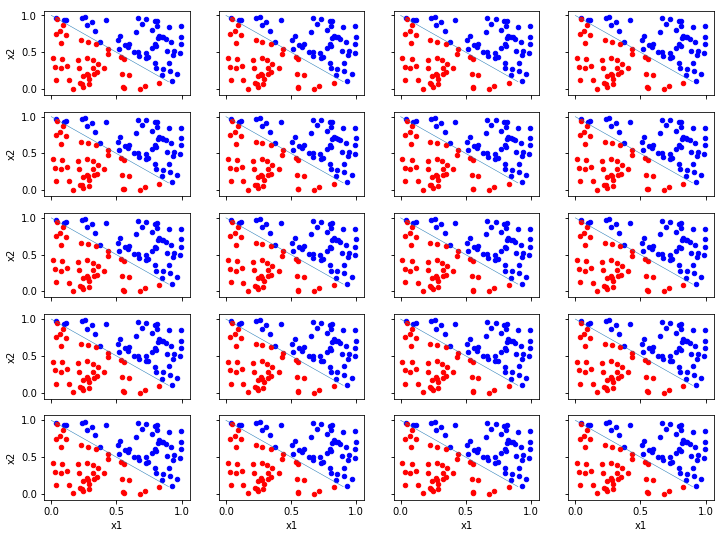

In [11]:
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(12, 9))
axes = axes.ravel()

for k, theta in enumerate(thetas_sample_b[:20]):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    dfb.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
    dfb.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

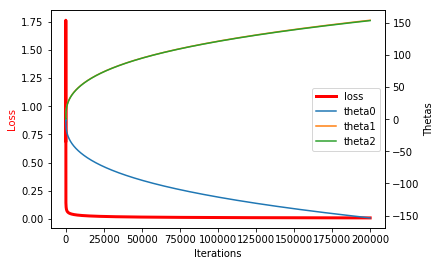

In [12]:
iz = np.arange(1,len(losses_b)+1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lss, = ax1.plot(iz, losses_b, 'r-', label = 'loss', linewidth=3)
th0, = ax2.plot(iz, thetas_b[:,0], label='theta0')
th1, = ax2.plot(iz, thetas_b[:,1], label='theta1')
th2, = ax2.plot(iz, thetas_b[:,2], label='theta2')
plt.legend(handles=[lss, th0, th1, th2])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Thetas')
ax2
plt.show()

Back in problem-set-1, Q1-Logisitic Regression.ipynb, sections 8 and 9, we discussed the decision boundary. We repeat here:

Recall that

$$
P(y=1\mid X=x;\theta)=h_\theta(x)=g(z)
$$

where $z=\theta^Tx$ and $g(z)=\frac1{1+e^{-z}}$ is the sigmoid function.

One possible way to predict the value of $y$ is to do this:

$$
\text{prediction}=\begin{cases}\text{predict }y=1&\text{when }h_\theta(x)>\frac{1}{2}\\\text{predict }y=-1&\text{when }h_\theta(x)<\frac{1}{2}\end{cases}
$$

Notice that $h_\theta(x)\equiv g(z)$ is greater than $\frac12$ exactly when $\theta^Tx\equiv z>0$ and $h_\theta(x)\equiv g(z)$ is less than $\frac12$ exactly when $\theta^Tx\equiv z<0$. So the decision boundary is

$$
0=\theta^Tx=\theta_0+\theta_1x_1+\theta_2x_2\iff-\theta_2x_2=\theta_0+\theta_1x_1\iff x_2=\frac{\theta_0+\theta_1x_1}{-\theta_2}
$$

Now notice that any scalar multiple of $\theta=[\theta_0, \theta_1, \theta_2]$ gives us the same decision boundary:

$$
x_2=\frac{c\theta_0+c\theta_1x_1}{-c\theta_2}=\frac{c(\theta_0+\theta_1x_1)}{-c\theta_2}=\frac{\theta_0+\theta_1x_1}{-\theta_2}\tag{LRTS.1}
$$

Hence we can make the weights arbitrarily large and still get the same decision boundary.

Define a dataset of size $m$ to be __linearly separable__ if for all $i=1,...,m$ there exists $\theta$ such that

$$
y^{(i)}\theta^Tx^{(i)}>0
$$

If such a $\theta$ exists then $\theta$ is said to produce a __separating hyperplane__.

Notice that dataset B is linearly separable:

In [13]:
margins_b = Yb * Xb.dot(thetas_b[-1])
margins_b[margins_b<=0]

array([], dtype=float64)

But dataset A is not linearly separable:

In [14]:
margins_a = Ya * Xa.dot(thetas_a[-1])
margins_a[margins_a<=0]

array([-1.32917086, -0.68532323, -1.14214767, -0.15720415, -1.61444502,
       -0.57104762, -2.03107549, -0.06787698])

Lemma 1 on p.3 of [this research paper](https://arxiv.org/pdf/1710.10345.pdf) shows that, for linearly separable datasets, gradient descent will produce an unbounded weight vector. This lemma essentially says this: for an appropriate loss function, gradient descent will find a vector of weights that gives a separating hyperplane for a linearly separable dataset. Then GD will scale this weight vector to infinity. LRTS.1 tells us that this scaling can indeed continue indefinitely.

This explains why performing logistic regression on dataset B doesn't converge as quickly for dataset A: in order for GD to converge for a linearly separable dataset, the weight vector must become arbitrarily large.

Lemma 1 from that paper is a bit abstract. We will present a similar but more concrete and intuitive proof here:

__Proposition__ Given the logistic loss and a linearly separable dataset, logistic regression convergence produces a weight vector that is unbounded above and gives a separating hyperplane. That is

$$
\lim_{t\rightarrow\infty}\nabla J(\theta_t)=0\implies\lim_{t\rightarrow\infty}\lvert\theta_t\rvert=\infty\quad\text{and}\quad y^{(i)}\theta_t^Tx^{(i)}>0\quad\forall i\text{, for sufficiently large }t
$$

__Proof__ Our loss function is

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)=\frac{1}{m}\sum_{i=1}^{m}\log\big(1+e^{-y^{(i)}\theta^Tx^{(i)}}\big)
$$

From LLG.1 near the top of the page, we have

$$\begin{align*}
\nabla J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}
\end{align*}$$

Since the dataset is linearly separable, then there exists $\theta_*$ such that $y^{(i)}\theta_*^Tx^{(i)}>0$. Hence for all possible weights $\theta$, we have

$$\begin{align*}
\theta_*^T\nabla J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}\theta_*^Tx^{(i)}<0
\end{align*}$$

The inequality follows because $g=$ sigmoid is positive. Since this holds for all $\theta$, then there are no finite critical points $\theta$ such that $\nabla J(\theta)=0$. If there were such a $\theta$, then we would have $\theta_*^T\nabla J(\theta)=0$.

But gradient descent on a smooth loss with an appropriate stepsize is always guaranteed to converge to a critical point: $\nabla J(\theta_t)\rightarrow0$ as $t\rightarrow\infty$ (see, e.g. Lemma 10 in Appendix A.4 of [this research paper](https://arxiv.org/pdf/1710.10345.pdf), slightly adapted from Ganti (2015), Theorem 2). That is

$$
\lim_{t\rightarrow\infty}-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta_t^Tx^{(i)}\big)y^{(i)}x^{(i)}=\lim_{t\rightarrow\infty}\nabla J(\theta_t)=0
$$

Since the dataset is fixed, we have

$$
\lim_{t\rightarrow\infty}\sum_{i=1}^{m}g\big(-y^{(i)}\theta_t^Tx^{(i)}\big)=0
$$

Since $g$ is positive, for all $i=1,...,m$, we have

$$
\lim_{t\rightarrow\infty}g\big(-y^{(i)}\theta_t^Tx^{(i)}\big)=0
$$

But $g(-z)=\frac{1}{1+e^{z}}$ goes to zero if and only if $z\rightarrow\infty$. Hence, for all $i=1,...,m$, we have

$$
\lim_{t\rightarrow\infty}y^{(i)}\theta_t^Tx^{(i)}=\infty>0
$$

Since the dataset is fixed, this implies that

$$
\lim_{t\rightarrow\infty}\lvert\theta_t\rvert=\infty
$$

$\blacksquare$

We can also present a very intuitive but informal argument for this as well: we want to minimize the logistic loss $\frac{1}{m}\sum_{i=1}^{m}\log\big(1+e^{-y^{(i)}\theta^Tx^{(i)}}\big)$. To minimize a single observation $\log\big(1+e^{-y^{(i)}\theta^Tx^{(i)}}\big)$, we want to minimize $e^{-y^{(i)}\theta^Tx^{(i)}}$ and hence minimize $-y^{(i)}\theta^Tx^{(i)}$. Hence we want to maximize $y^{(i)}\theta^Tx^{(i)}$ (and make it positive) and hence we want to maximize $\lvert\theta\rvert$.

And here is another intuitive interpretation: Logistic Regression takes a long time to converge on dataset B because that dataset is perfectly linearly separable (i.e. has a separating hyperplane). After discovering this separating hyperplane, the algorithm is just trying to increase the scale of $\theta$ so as to increase $\lvert y\theta^Tx\rvert$. This produces a higher probability and hence higher likelihood. But the theorectical maximum of LLG.0 is $1$ which only occurs when $\theta=\infty$.

This doesn't happen to A because it's not linearly separable.

# (c)

In [15]:
# Here we scale the learning rate geometrically (divide by iterations squared). While regression
# does converge, we get a suboptimal weight vector that doesn't give a separating hyperplane
# (5 boundary errors). We know such a hyperplane exists for dataset B.

thetas_b_slrg, thetas_sample_b_slrg, errors_b_slrg, losses_b_slrg = logistic_regression(Xb, Yb, scale_lr_geom=True)
print("theta for dataset b={}".format(thetas_b_slrg[-1]))
margins_b_slrg = Yb * Xb.dot(thetas_b_slrg[-1])
margins_b_slrg[margins_b_slrg<=0]

Converged in 12 iterations
theta for dataset b=[-1.24730568  1.41599194  1.00897731]


array([-0.21423847, -0.13424357, -0.07327046, -0.16984596, -0.01483175])

In [16]:
# Here we scale the learning rate proportionately. We get much better convergence and a separating hyperplane.

thetas_b_slrp, thetas_sample_b_slrp, errors_b_slrp, losses_b_slrp = logistic_regression(Xb, Yb, scale_lr_prop=.999)
print("theta for dataset b={}".format(thetas_b_slrp[-1]))
margins_b_slrp = Yb * Xb.dot(thetas_b_slrp[-1])
margins_b_slrp[margins_b_slrp<=0]

iters=10000 theta=[-23.00670072  23.43931131  22.84069792] error=6.421325194941399e-07 loss=0.06506152526839235
iters=20000 theta=[-23.00707326  23.43967538  22.84107224] error=2.9007585200545914e-11 loss=0.06506061346710618
Converged in 29158 iterations
theta for dataset b=[-23.00707328  23.4396754   22.84107226]


array([], dtype=float64)

In [17]:
# Here we regress with regularization. We get convergence and a separating hyperplane. Notice that
# the loss is substantially higher for regularized training. I guess this just means we're not overfitting?

thetas_b_reg, thetas_sample_b_reg, errors_b_reg, losses_b_reg = logistic_regression(Xb, Yb, regularization=.00001)
print("theta for dataset b={}".format(thetas_b_reg[-1]))
margins_b_reg = Yb * Xb.dot(thetas_b_reg[-1])
margins_b_reg[margins_b_reg<=0]

iters=10000 theta=[-28.20918668  28.54252653  28.07022248] error=3.551845066615569e-05 loss=0.07845835792584399
iters=20000 theta=[-28.24568473  28.57848989  28.10689664] error=1.3001287605093338e-07 loss=0.07845824559442752
iters=30000 theta=[-28.24581849  28.5786217   28.10703105] error=4.770526783707241e-10 loss=0.07845824559291995
iters=40000 theta=[-28.24581898  28.57862218  28.10703154] error=1.7497069782835412e-12 loss=0.07845824559291993
iters=50000 theta=[-28.24581898  28.57862218  28.10703154] error=6.153480596427404e-15 loss=0.07845824559291996
Converged in 51264 iterations
theta for dataset b=[-28.24581898  28.57862218  28.10703154]


array([], dtype=float64)

In [18]:
# Here we check regularization on dataset A. Note that the number and size of
# boundary errors are similar to those when we don't use regularization.

thetas_a_reg, thetas_sample_a_reg, errors_a_reg, losses_a_reg = logistic_regression(Xa, Ya, regularization=.00001)
print("theta for dataset a={}".format(thetas_a_reg[-1]))
margins_a_reg = Ya * Xa.dot(thetas_a_reg[-1])
margins_a_reg[margins_a_reg<=0]

iters=10000 theta=[-17.83139822  18.37388125  16.91953862] error=9.106047725064535e-10 loss=0.1707852090727224
Converged in 17660 iterations
theta for dataset a=[-17.83139854  18.37388157  16.91953893]


array([-1.22217909, -0.5266626 , -0.91255236, -0.16407398, -1.34437157,
       -0.51349243, -1.79935563, -0.14121857])

In [19]:
# Gaussian noise

mean, std = np.mean(Xb, axis=0), np.std(Xb, axis=0)
print("mean={}  std={}".format(mean, std))
Xnoise0 = np.random.normal(0, .04, [100,1])
Xnoise1 = np.random.normal(0, .01, [100,1])
Xnoise2 = np.random.normal(0, .01, [100,1])
Xnoise = np.hstack((Xnoise0, Xnoise1, Xnoise2))
Xbn = Xb + Xnoise
print("Xb={}  Xbn={}".format(Xb.shape, Xbn.shape))

Ynoise = np.random.normal(0, .6, (100,))
Ybn = Yb + Ynoise

thetas_b_gn, thetas_sample_b_gn, errors_b_gn, losses_b_gn = logistic_regression(Xbn, Ybn)
print("theta for dataset b={}".format(thetas_b_gn[-1]))
margins_b_gn = Yb * Xb.dot(thetas_b_gn[-1])
margins_b_gn[margins_b_gn<=0]

mean=[ 1.          0.512781    0.50270735]  std=[ 0.          0.30157938  0.28682305]
Xb=(100, 3)  Xbn=(100, 3)
iters=10000 theta=[-32.62637321  32.61395779  32.66355695] error=0.00018828077750764573 loss=0.14109409428170794
iters=20000 theta=[-32.92259581  32.90827493  32.96125001] error=5.442188411244677e-06 loss=0.14108914375284395
iters=30000 theta=[-32.93125715  32.91688107  32.96995456] error=1.6096658310203008e-07 loss=0.14108913955082192
iters=40000 theta=[-32.93151342  32.9171357   32.9702121 ] error=4.76419108717556e-09 loss=0.1410891395471441
iters=50000 theta=[-32.931521    32.91714324  32.97021973] error=1.4101057938278087e-10 loss=0.14108913954714095
iters=60000 theta=[-32.93152123  32.91714346  32.97021995] error=4.172108249057426e-12 loss=0.1410891395471409
iters=70000 theta=[-32.93152124  32.91714347  32.97021996] error=1.230696119285481e-13 loss=0.1410891395471409
Converged in 78491 iterations
theta for dataset b=[-32.93152124  32.91714347  32.97021996]


array([], dtype=float64)

i. Using a different constant learning rate.

**Answer:** No, $\theta$ still needs to go to infinity to make $\nabla J(\theta)\rightarrow0$.

ii. Decreasing the learning rate over time (e.g. scaling the initial learning rate by $1/t^2$, where $t$ is the number of gradient descent iterations thus far).

**Answer:** Mixed results, please see the two sections above where we scale the learning rate. Scaling geometrically, we get extremely fast convergence but a suboptimal decision boundary (5 boundary errors). So I don't think this is a good option. Scaling proportionately, we get much better convergence (than without scaling) and a separating hyperplane. So this is a good option.

I guess it's intuitive why scaling the learning rate gives faster convergence: the error term $E_{sc}$ is

$$
E_{sc}\equiv\lvert\theta_{t+1}-\theta_t\rvert=\lvert\theta_t-\alpha_{t+1}\nabla J(\theta_t)-\theta_t\rvert=\lvert-\alpha_{t+1}\nabla J(\theta_t)\rvert=\alpha_{t+1}\lvert\nabla J(\theta_t)\rvert
$$

Similarly the error term without scaling is

$$
E_{wosc}\equiv\lvert\theta_{t+1}'-\theta_t'\rvert=\alpha\lvert\nabla J(\theta_t')\rvert
$$

Let's assume that $\lvert\nabla J(\theta_t')\rvert\approx\lvert\nabla J(\theta_t)\rvert$ for all $t=1,2,...$. Or perhaps it's more appropriate to assume that $\lvert\nabla J(\theta_t)\rvert=O\big(\lvert\nabla J(\theta_t')\rvert\big)$ as $t\rightarrow0$? Then since $\alpha_t\rightarrow0$ quickly, we see that $E_{sc}\rightarrow0$ much faster than $E_{wosc}\rightarrow0$.

iii. Adding a regularization term $\lvert\theta\rvert^2_2$ to the loss function.

**Answer:** Yes, please see the section above where we add regularization and get convergence and a separating hyperplane. It is intuitive why this works: when we add the magnitude of $\theta$ to the objective function, then gradient descent will try to minimize $\lvert\theta\rvert$ in balance with minimizing the original objective.

Notice that the loss is substantially higher for regularized training. I guess this just means we're not overfitting?

iv. Linear scaling of the input features.

**Answer:** No, scaling input features is irrelevant to $\theta$ getting infinitely large.

v. Adding zero-mean Gaussian noise to the training data or labels

**Answer:** Maybe, please see the section above where we add Gaussian noise. Playing around with the standard deviation parameters produces various but mostly consistent results. The parameters in that section (.04, .01, .01, .6) produce few to no boundary errors (i.e. a separating hyperplane or close to it) and much better convergence than without Gaussian noise.

# (d)

Dataset B won't cause a problem for SVM because in SVM, it tries to maximize the geometric margin, which won't be affected by scaling $\left|\left|\theta\right|\right|$.

**More details** in response to [Issue 3](https://github.com/zyxue/stanford-cs229/issues/3).

Comparing logistic regression with SVM (with a linear kernel), both look for a hyperplane, but with different goals in mind:

* LR searches for a hyperplane that maximizes the likelihood, while
* SVM looks for a hyperplane that maximizes the margin.

In standard logistic regression, the goal is the maximize

\begin{align*}
\max_{\theta}L(\theta) 
&= \max_{\theta} \prod_{i=1}^{m} (h_{\theta}(x^{(i)}))^{y{(i)}} (1 - h_{\theta}(x^{(i)}))^{1 - y{(i)}} \\
&= \max_{\theta} \prod_{i=1}^{m} (\frac{1}{1 + e^{-\theta^T x}})^{y{(i)}} (1 - \frac{1}{1 + e^{-\theta^T x}})^{1 - y{(i)}} \\
\end{align*}


where $h_{\theta}$ is the sigmoid function, and $y \in \{0, 1\}$.

In the Ng's [SVM note](http://cs229.stanford.edu/notes/cs229-notes3.pdf), it introduces two concepts about margin, and data are labeled differently, $y \in \{-1, 1\}$. Also, it replaces $\left|\left|\theta \right|\right|$ with $w$ and $b$.

**Functional margin**, which is affected by scaling $w$ and $b$.

\begin{align*}
\hat \gamma &= \min_{i = 1,\cdots,m} \hat \gamma^{(i)} \\
&= \min_{i = 1,\cdots,m} y^{(i)}(w^Tx^{(i)} + b)
\end{align*}

**Geometric margin**, which won't be affected by scaling $w$ and $b$

\begin{align*}
\gamma &= \min_{i = 1,\cdots,m} \gamma^{(i)} \\
&= \min_{i = 1,\cdots,m} y^{(i)}\bigg(\big(\frac{w}{\left|\left|w\right|\right|})^T x^{(i)} + \frac{b}{\left|\left|w\right|\right|} \bigg)
\end{align*}

So in SVM, the final goal is to maximize geometric margin,

\begin{align*}
\max_{w, b} &\; \gamma \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \gamma, i=1,\cdots,m \\
&\; \left|\left|w\right|\right| = 1
\end{align*}

instead of functional margin. As seen, the two are related by $\left|\left|w\right|\right|$. Hence, the above can be   equivalently written as

\begin{align*}
\max_{w, b} &\; \frac{\hat \gamma}{\left|\left| w \right|\right|} \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \hat \gamma, i=1,\cdots,m \\
&\; \hat \gamma = 1
\end{align*}

Replacing $\hat \gamma$ with $1$,

\begin{align*}
\max_{w, b} &\; \frac{1}{\left|\left| w \right|\right|} \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \hat \gamma, i=1,\cdots,m \\
\end{align*}

Maximizing $\frac{1}{\left|\left| w \right|\right|}$ is equivalent to minimizing $\frac{1}{2}\left|\left| w \right|\right|^2$. The $\frac{1}{2}$ and taking square are probably just for mathmatical convenience when taking derivatives during optimization. Hence, we end up with the exact optimization problem as shown in the notes,

Replacing $\hat \gamma$ with $1$,

\begin{align*}
\min_{w, b} &\; \frac{1}{2} \left|\left| w \right|\right|^2 \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \hat \gamma, i=1,\cdots,m \\
\end{align*}

Inspecting the derivation, it started with 

**maximizing $\gamma$ while fixing $\left|\left|w\right|\right|$**,

which are then transformed into 

**minimizing $\left|\left|w\right|\right|$ while fixing $\hat \gamma$**.

It is like the two sides of the same coin. (Note $\gamma$ is equal to $\hat \gamma$ when $\left|\left|w\right|\right| = 1$)

theta for regularized B=[-28.246  28.579  28.107]
[ 0.997  0.609  1.     1.     1.     0.699  1.     0.575  0.998  1.     0.998
  1.     1.     0.995  0.999  1.     0.997  0.991  1.     1.     0.959  1.
  0.977  1.     1.     1.     0.524  1.     1.     0.817  1.     0.769
  0.999  1.     1.     1.     0.999  1.     1.     0.767  1.     1.     1.
  0.993  1.     0.993  0.999  1.     1.     1.     1.     0.652  1.     0.975
  0.979  1.     1.     0.983  1.     1.     1.     0.936  1.     1.     0.917
  0.985  0.761  0.907  1.     0.989  1.     0.982  1.     0.99   0.982  1.
  1.     1.     0.773  0.992  1.     1.     1.     0.998  1.     1.     1.
  0.592  1.     1.     0.877  0.989  0.998  1.     0.989  1.     1.     0.671
  1.     0.891]


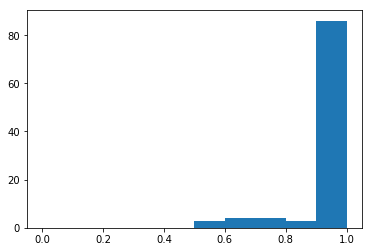

theta for unregularized B=[-153.673  154.195  153.66 ]


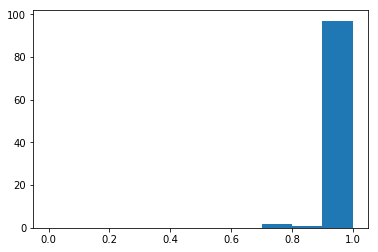

In [20]:
# This isn't part of the problem: I want to see the probabilities that our training produces,
# both for regularized and unregularized

#thetas_b, thetas_sample_b, errors_b, losses_b = logistic_regression(Xb, Yb)
print("theta for regularized B={}".format(thetas_b_reg[-1].round(3)))
margins = Yb * Xb.dot(thetas_b_reg[-1])
probs = sigmoid(margins)
print(probs.round(3))
plt.hist(x=probs, bins=[i/10 for i in range(11)])
plt.show()
print("theta for unregularized B={}".format(thetas_b[-1].round(3)))
margins = Yb * Xb.dot(thetas_b[-1])
probs = sigmoid(margins)
plt.hist(x=probs, bins=[i/10 for i in range(11)])
plt.show()

In [21]:

probs = sigmoid(margins)
probs.round(3)

array([ 1.   ,  0.929,  1.   ,  1.   ,  1.   ,  0.993,  1.   ,  0.729,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  0.768,  1.   ,  1.   ,  1.   ,  1.   ,  0.996,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.995,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  0.978,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  0.998,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.998,  1.   ,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.881,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  0.988,  1.   ,  1.   ])